# Avacado project


Avocado is a fruit consumed by poeple heavily in the United States.

This data was downloaded from the Hass Avocado Board website in May of 2018 and compiled into a single CSV.


The table below represents weekly 2018 retail scan data for National retail volume (Units) & Price. Retail scan data comes directly from retailers cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - The Average price of a single Avocado
    Type - Conventional or organic
    Year - the year
    Region - the city or region of the observation 
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold 
    4770 - Total number of avocados with PLU 4770 sold

Our task is to make a mode that can cosider the data provided and predict the Average Price.


Approach : There are different targets variable & both require different approach
    A - For predicting Region/City - Classification approach will be suitable 
    B - For predicting price - Regression approach will be suitable 
    

# Importing required libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Loading the dataset that is on csv file in downloads
df=pd.read_csv('Downloads/avocado.csv')
df=pd.DataFrame(data = df)
df.head(25)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [92]:
df.shape # ckecking the shape of dataset

(18249, 14)

Dataset has 18249 rows and 14 columns
We can drop unnamed & data columns to get better result
Type & Region columns will be required to be encoded
Since the data presented in different scale,so it required scaling
Dataset seems to have lots of zero, which will not allow model to learn appropriately

In [93]:
df.dtypes # checking the datatype for each colunms

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

As we can see that Date, Type & REgion are in object type and the remaning are in int & float type


In [94]:
df.info()# getting info for each attribute of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [95]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [96]:
# droping the unnamed:0 & date column from the data sets because it is of no use 
df.drop(["Unnamed: 0","Date"],axis = 1, inplace= True)


In [97]:
for col in ['4046','4225','4770','Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']:
    df[col].fillna(df[col].mean(), inplace =True) # Filling all "0"s with mean values of each column

In [98]:
df.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [99]:
df.tail(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [100]:
#check the shape of the datesets
df.shape

(18249, 12)

# Checking Missing values

In [101]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

As we can see there is no null values present in this dataset

<AxesSubplot:>

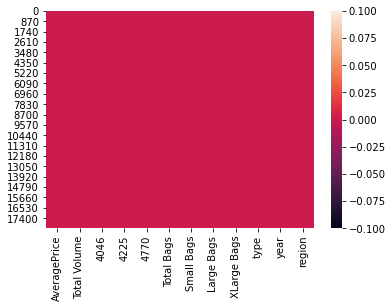

In [102]:
#checking null values through Graphical Visualization.
sns.heatmap(df.isnull())

we find there is no missing values in dataset

# Describing the dataset

In [103]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


As we can see Mean is greater than median in most of  the columns which means data is very spread
As Std is high and the difference between 75% & max is large so there must be outliers in dataset

# EDA and Data Visulaisation

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

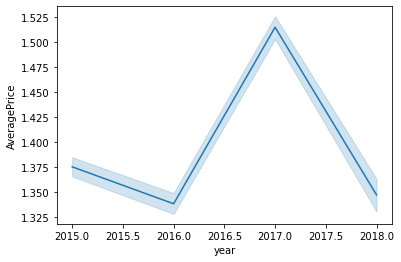

In [104]:
sns.lineplot(x = 'year', y = 'AveragePrice', data=df)

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

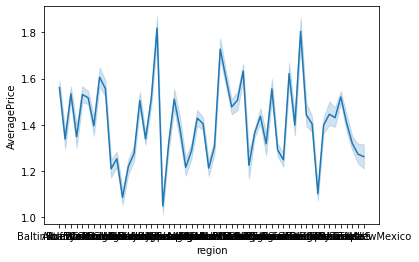

In [105]:
sns.lineplot(x = 'region', y = 'AveragePrice', data=df)

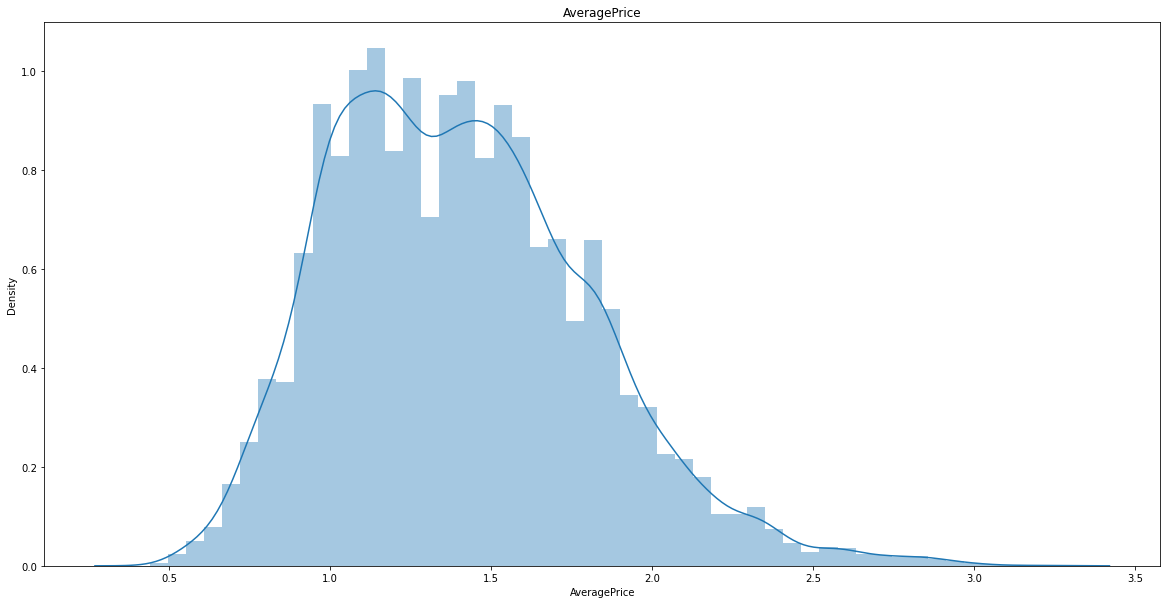

In [106]:
plt.figure(figsize = (20, 10))
sns.distplot(df.AveragePrice)
plt.title("AveragePrice")
plt.show()

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

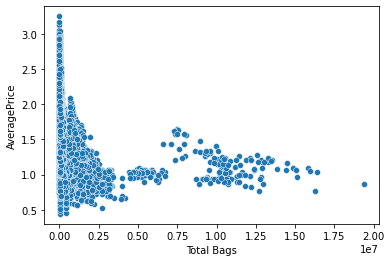

In [107]:
sns.scatterplot(x='Total Bags' , y = 'AveragePrice', data=df)

<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

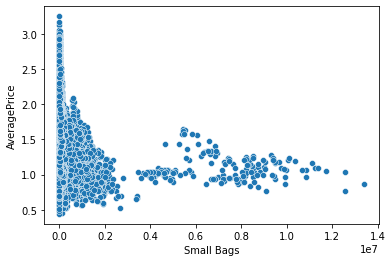

In [108]:
sns.scatterplot(x='Small Bags' , y = 'AveragePrice', data=df)

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

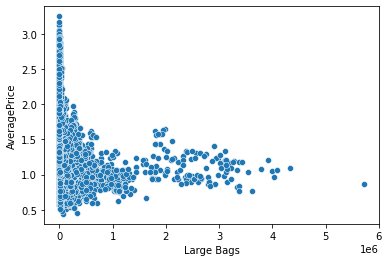

In [109]:
sns.scatterplot(x='Large Bags' , y = 'AveragePrice', data=df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

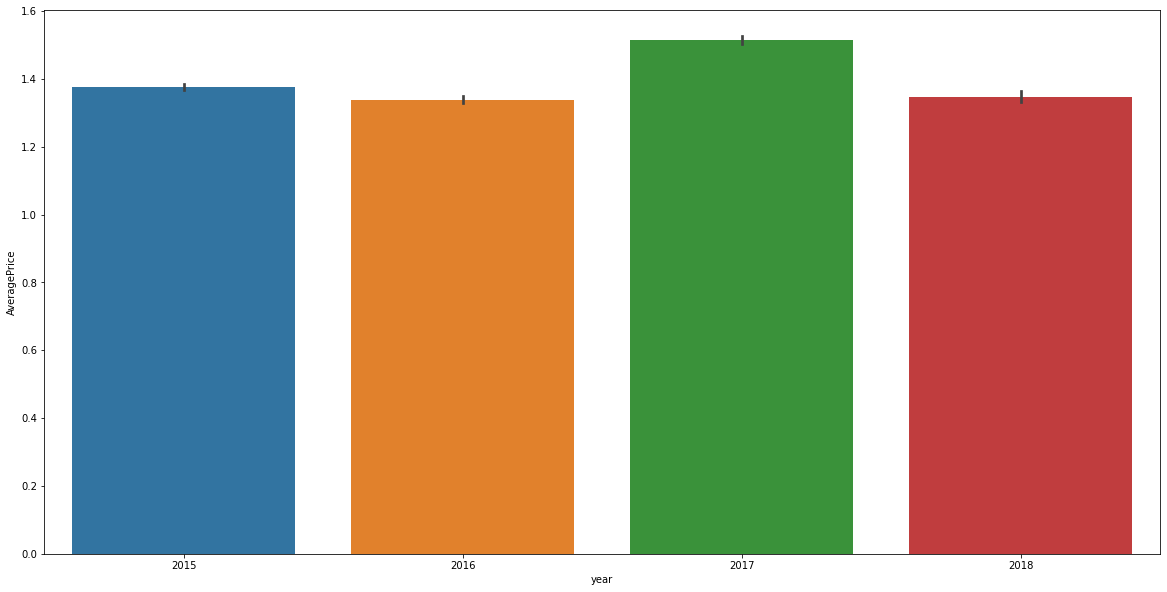

In [110]:
plt.figure(figsize=(20,10))
sns.barplot(x='year',y='AveragePrice',data=df)



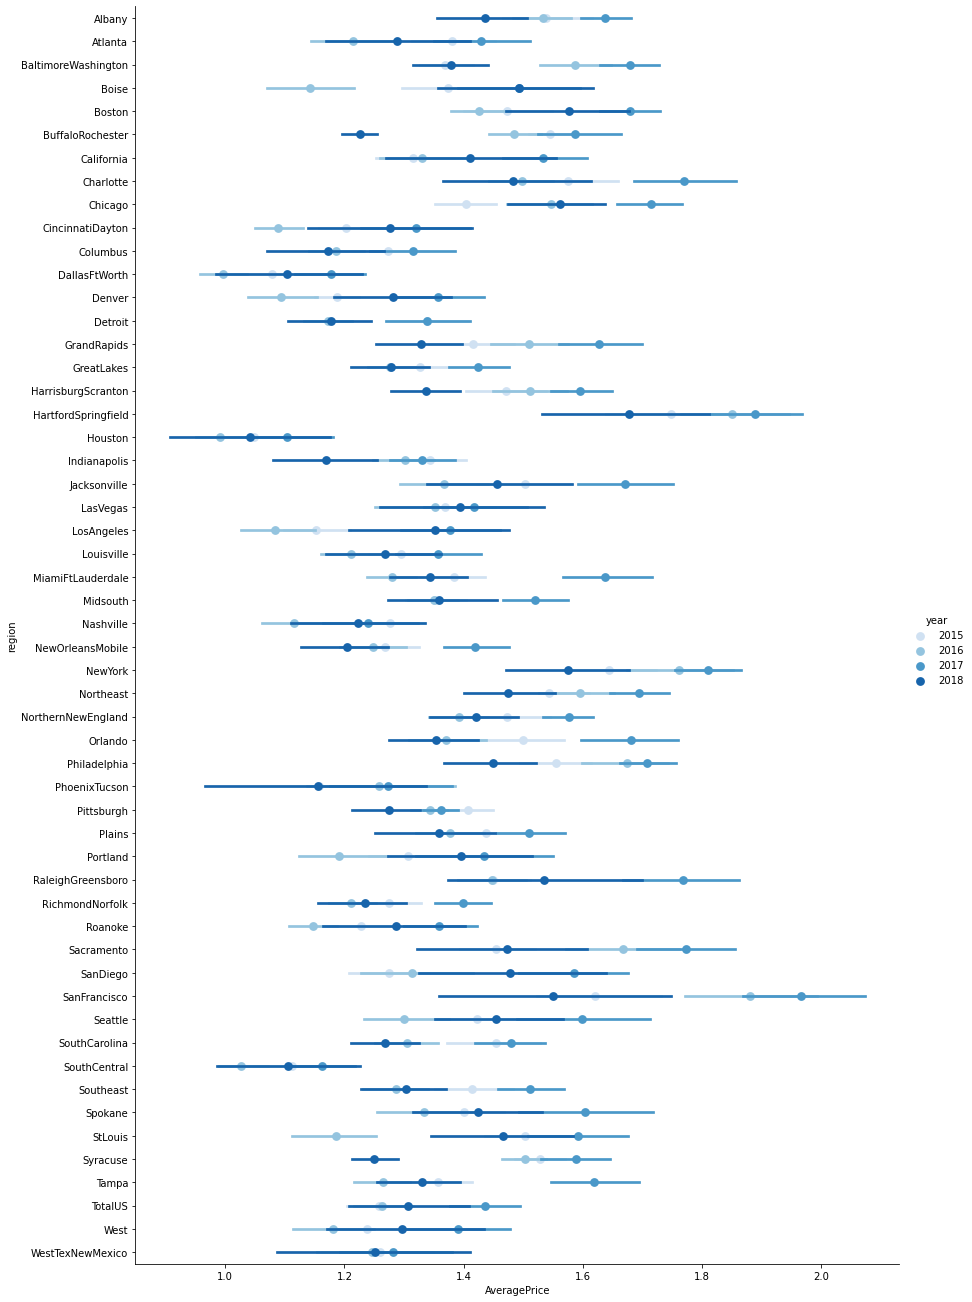

In [112]:
sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

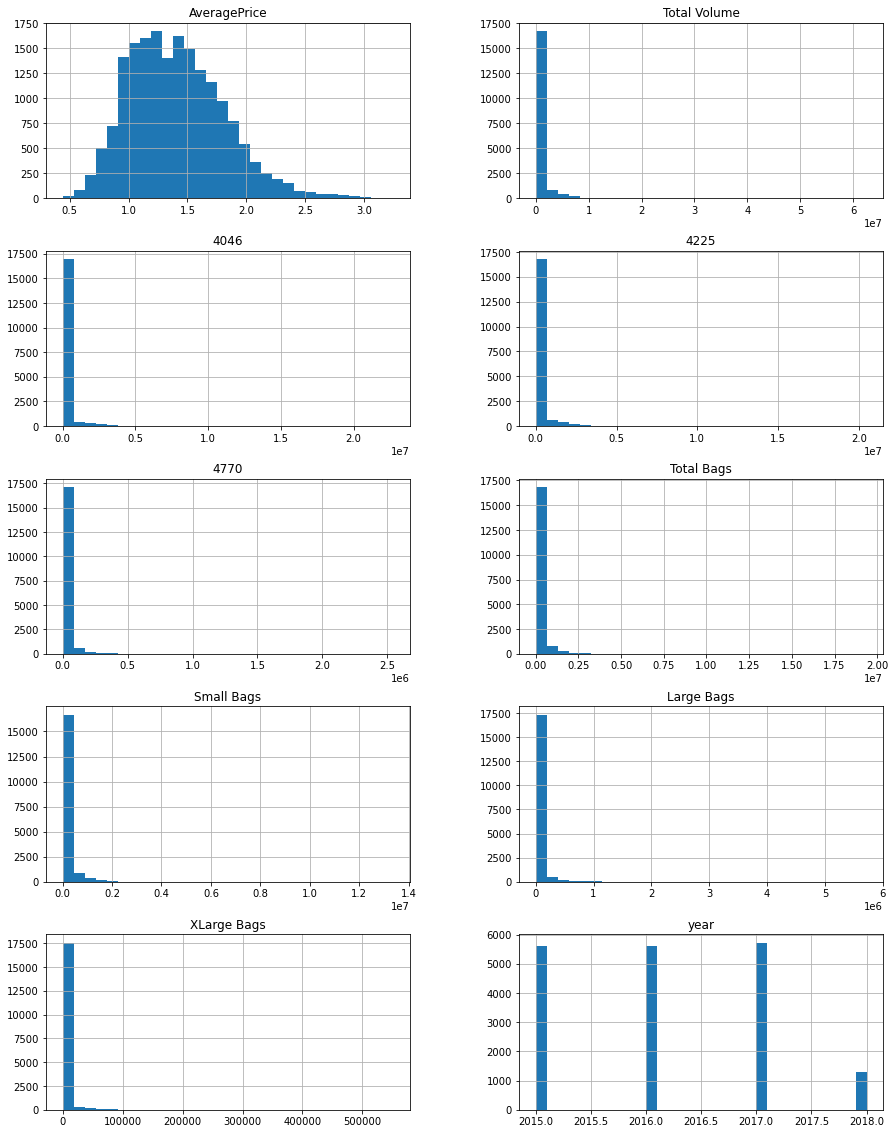

In [113]:
df.hist(figsize=(15,20),grid=True,layout=(5,2),bins=30)

# Check corelation

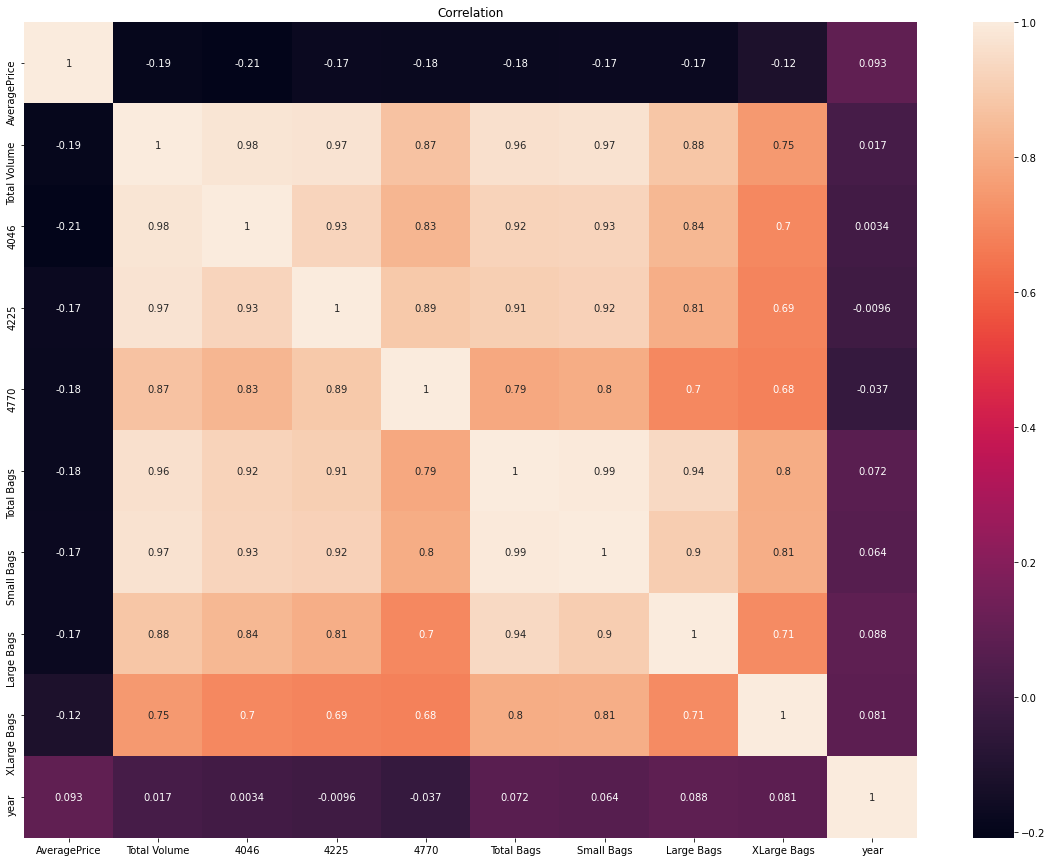

In [114]:
plt.figure(figsize = [20,15])
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation')
plt.show()

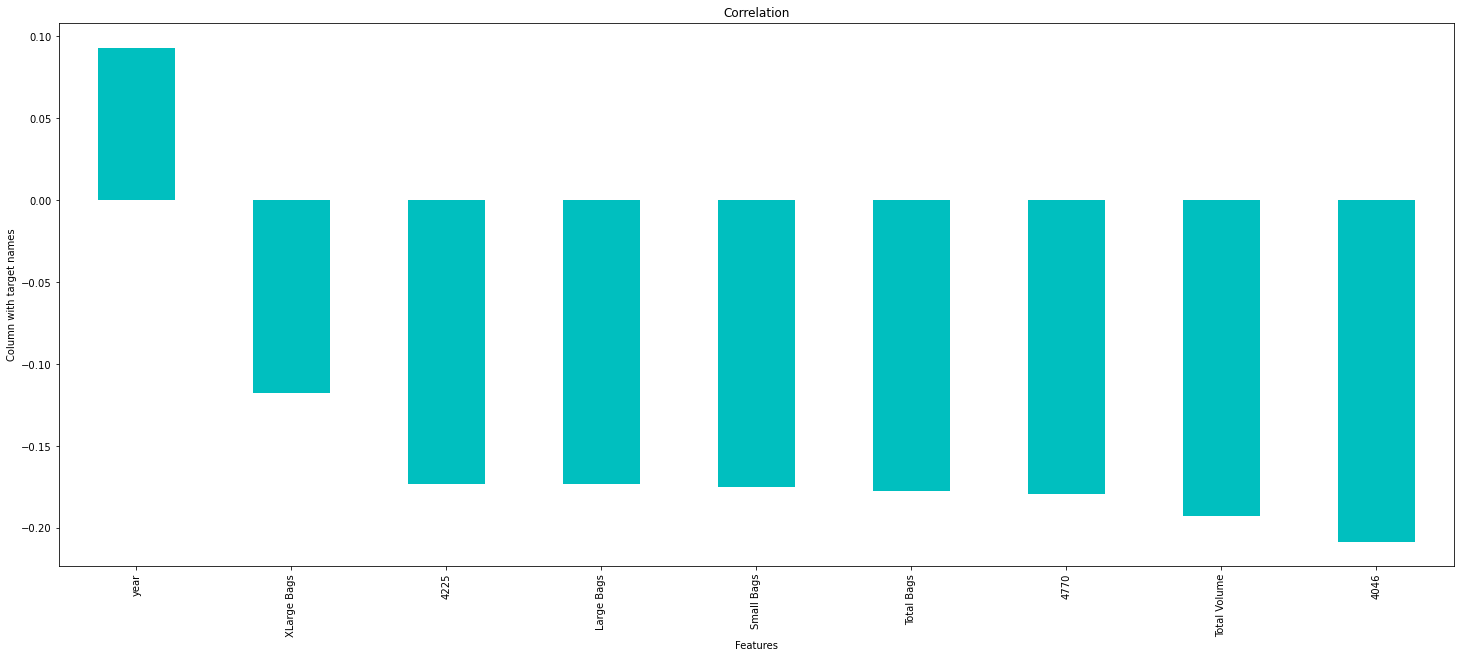

In [115]:
plt.figure(figsize = (25, 10))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Most of the columns have negative correlation with Average price.
As we can see 4046 have hthe higest correlation with average preice at -0.0096


In [116]:
#Show the Categorical Data
categorical = df.select_dtypes(include = ["object"]).keys()
categorical

Index(['type', 'region'], dtype='object')

In [117]:
#Show the Numerical data 
Numerical = df.select_dtypes(include = ["int64"]).keys()
Numerical


Index(['year'], dtype='object')

In [118]:
#Show the Float data 
Float = df.select_dtypes(include = ["float64"]).keys()
Float

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

<AxesSubplot:>

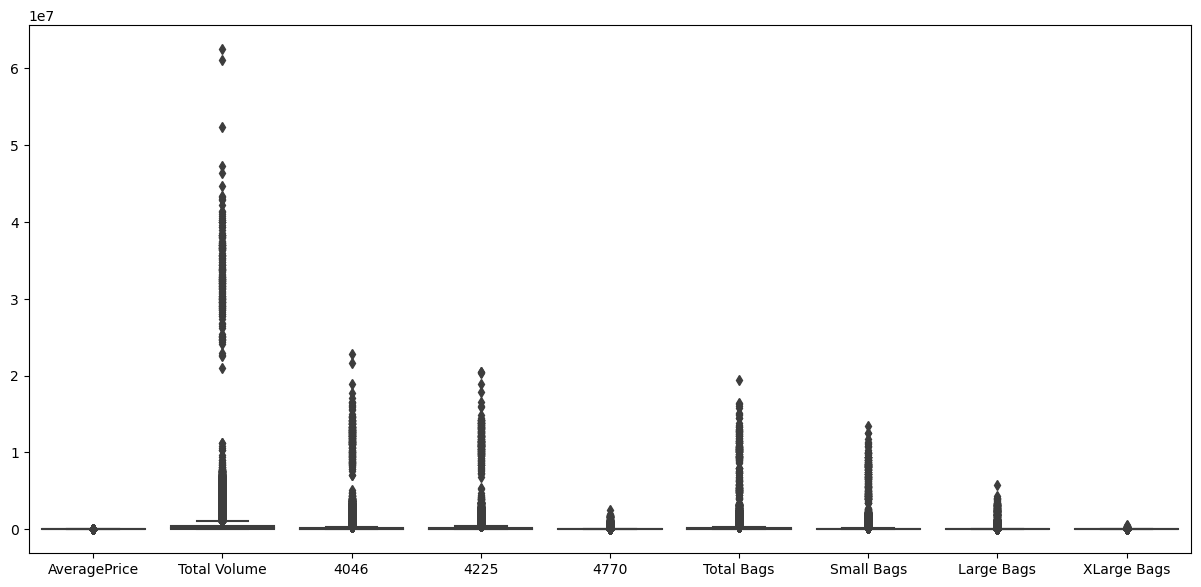

In [119]:
#Usnig the Box plot 
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = df[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [120]:
#Removing the Outliars With the Help of Quartiles Technique
from numpy import percentile
columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

In [121]:
df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [123]:
df.shape

(18249, 12)

<AxesSubplot:>

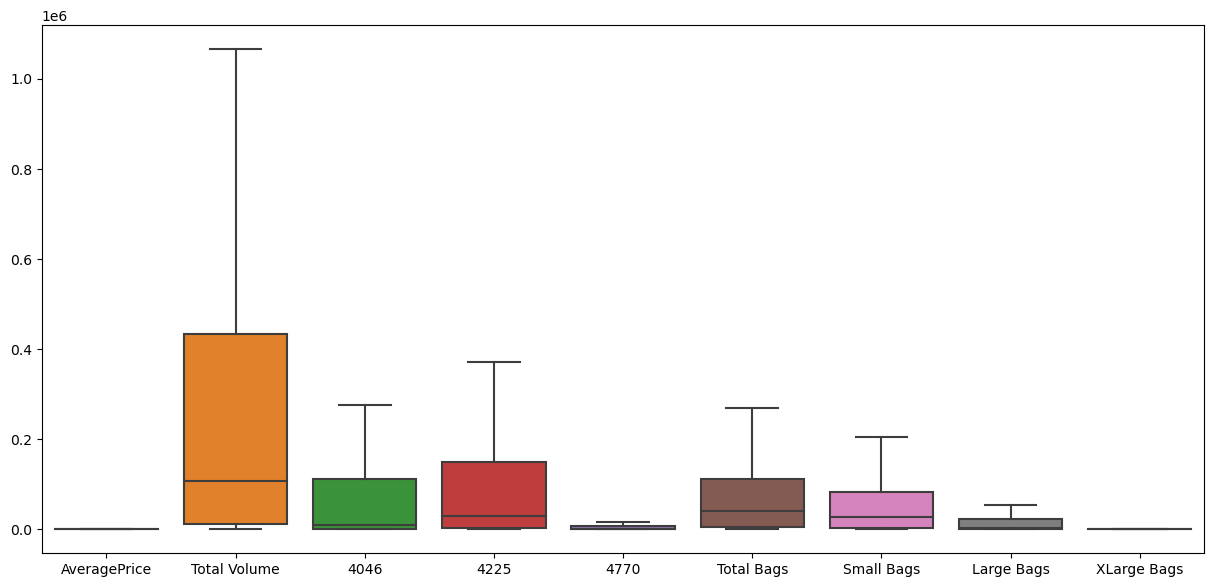

In [124]:
#Usnig the Box plot 
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = df[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

As we can see there are no outlier present in dataset 

# Train test Split

In [130]:
#Assign value to x
x=df.drop('AveragePrice',axis=1)

In [131]:
x.shape

(18249, 11)

In [132]:
y = df['AveragePrice']

In [133]:
y.shape

(18249,)

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=42)

In [135]:
x_train.shape

(12774, 11)

In [136]:
x_test.shape

(5475, 11)

In [137]:
y_train.shape

(12774,)

In [138]:
y_test.shape

(5475,)

# Use Algorithm